In [1]:
import pandas as pd

In [4]:
df = pd.read_csv("enrollment.csv")

In [ ]:
# Total Enrolment Column Banana

In [5]:
df["total_enrollment"] = (
    df["age_0_5"] +
    df["age_5_17"] +
    df["age_18_greater"]
)


In [ ]:
# State-wise Total Aadhaar Enrolment


In [8]:
state_summary = (
    df.groupby("state_clean")["total_enrollment"]
      .sum()
      .reset_index()
      .sort_values(by="total_enrollment", ascending=False)
)

print(state_summary)


                                 state_clean  total_enrollment
33                             Uttar Pradesh           1002317
4                                      Bihar            593381
19                            Madhya Pradesh            487468
35                               West Bengal            366798
20                               Maharashtra            362038
28                                 Rajasthan            340415
10                                   Gujarat            274018
3                                      Assam            225159
15                                 Karnataka            215393
30                                Tamil Nadu            213215
14                                 Jharkhand            153260
1                             Andhra Pradesh            144281
25                                    Odisha            118811
22                                 Meghalaya            109009
31                                 Telangana           

In [ ]:
# Top 10 & Bottom 10 States (Raw View)

In [9]:
print("\nTop 10 States by Aadhaar Enrolment:")
print(state_summary.head(10))

print("\nBottom 10 States by Aadhaar Enrolment:")
print(state_summary.tail(10))



Top 10 States by Aadhaar Enrolment:
       state_clean  total_enrollment
33   Uttar Pradesh           1002317
4            Bihar            593381
19  Madhya Pradesh            487468
35     West Bengal            366798
20     Maharashtra            362038
28       Rajasthan            340415
10         Gujarat            274018
3            Assam            225159
15       Karnataka            215393
30      Tamil Nadu            213215

Bottom 10 States by Aadhaar Enrolment:
                                 state_clean  total_enrollment
23                                   Mizoram              5750
2                          Arunachal Pradesh              4215
26                                Puducherry              2816
5                                 Chandigarh              2672
9                                        Goa              2277
29                                    Sikkim              2107
7   Dadra And Nagar Haveli And Daman And Diu              1923
0           

In [ ]:
# Overall Human-Readable Ranking
# (Index 0 se nahi, Rank 1 se start hoga)


In [10]:
state_summary = state_summary.reset_index(drop=True)
state_summary["Overall_Rank"] = range(1, len(state_summary) + 1)


In [ ]:
# Top-10 States (Clean Ranking 1–10)


In [12]:
top10 = state_summary.head(10).copy()
top10 = top10.reset_index(drop=True)
top10["Top10_Rank"] = range(1, len(top10) + 1)

print("\n🏆 Top-10 States (Clean Ranking 1–10):")
print(
    top10[["Top10_Rank", "state_clean", "total_enrollment"]]
    .to_string(index=False)
)



🏆 Top-10 States (Clean Ranking 1–10):
 Top10_Rank    state_clean  total_enrollment
          1  Uttar Pradesh           1002317
          2          Bihar            593381
          3 Madhya Pradesh            487468
          4    West Bengal            366798
          5    Maharashtra            362038
          6      Rajasthan            340415
          7        Gujarat            274018
          8          Assam            225159
          9      Karnataka            215393
         10     Tamil Nadu            213215


In [ ]:
# Bottom-10 States (Clean Ranking 1–10)

In [13]:
bottom10 = state_summary.tail(10).copy()
bottom10 = bottom10.reset_index(drop=True)
bottom10["Bottom10_Rank"] = range(1, len(bottom10) + 1)

print("\n🔻 Bottom-10 States (Clean Ranking 1–10):")
print(
    bottom10[["Bottom10_Rank", "state_clean", "total_enrollment"]]
    .to_string(index=False)
)




🔻 Bottom-10 States (Clean Ranking 1–10):
 Bottom10_Rank                              state_clean  total_enrollment
             1                                  Mizoram              5750
             2                        Arunachal Pradesh              4215
             3                               Puducherry              2816
             4                               Chandigarh              2672
             5                                      Goa              2277
             6                                   Sikkim              2107
             7 Dadra And Nagar Haveli And Daman And Diu              1923
             8              Andaman And Nicobar Islands               471
             9                                   Ladakh               210
            10                              Lakshadweep               199


In [ ]:
#🔹 STEP-4.1 — Top-10 States


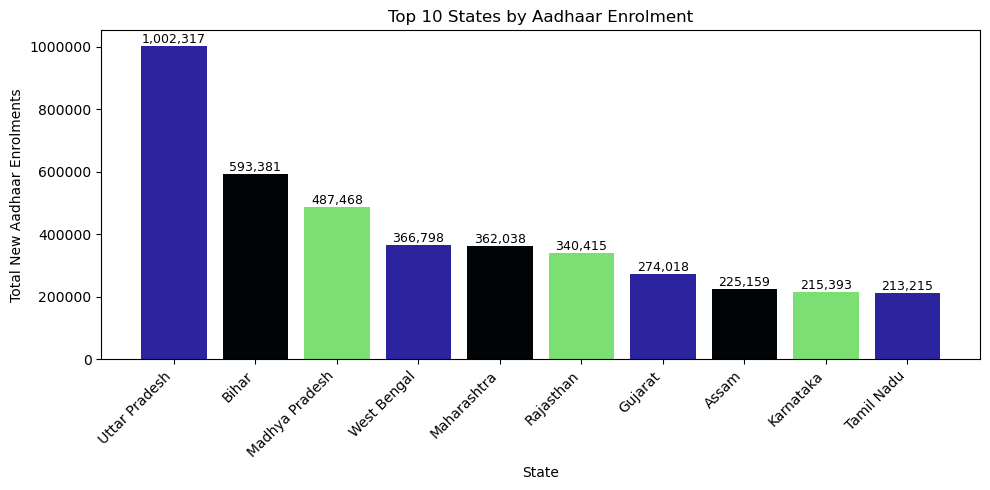

In [14]:
import matplotlib.pyplot as plt
colors = ["#2c249f", "#000407", "#7bdf72"]

plt.figure(figsize=(10,5))
bars = plt.bar(
    top10["state_clean"],
    top10["total_enrollment"],
    color=colors * 4   # repeat colors automatically
)

plt.xticks(rotation=45, ha="right")
plt.title("Top 10 States by Aadhaar Enrolment")
plt.xlabel("State")
plt.ylabel("Total New Aadhaar Enrolments")
plt.ticklabel_format(style="plain", axis="y")

for bar in bars:
    h = bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2, h, f"{int(h):,}",
             ha="center", va="bottom", fontsize=9)

plt.tight_layout()


In [ ]:
### Bottom-10 States

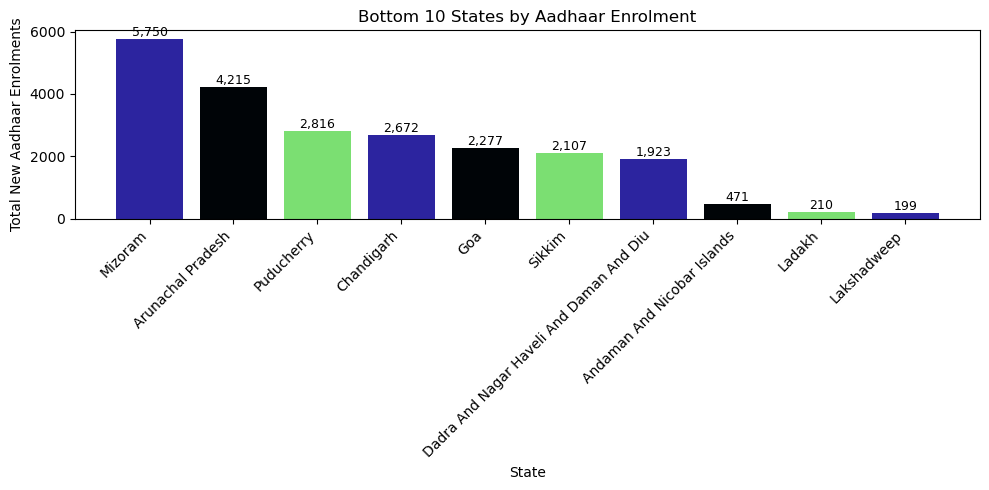

In [16]:
plt.figure(figsize=(10,5))
bars = plt.bar(
    bottom10["state_clean"],
    bottom10["total_enrollment"],
    color=colors * 4
)

plt.xticks(rotation=45, ha="right")
plt.title("Bottom 10 States by Aadhaar Enrolment")
plt.xlabel("State")
plt.ylabel("Total New Aadhaar Enrolments")
plt.ticklabel_format(style="plain", axis="y")

for bar in bars:
    h = bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2, h, f"{int(h):,}",
             ha="center", va="bottom", fontsize=9)

plt.tight_layout()


In [ ]:
# ===== REQUIRED: create daily_pulse BEFORE plotting =====

In [17]:

df["date"] = pd.to_datetime(
    df["date"],
    format="mixed",
    dayfirst=True,
    errors="coerce"
)

df = df[df["date"].notna()]

daily_pulse = (
    df.groupby("date")["total_enrollment"]
      .sum()
      .reset_index()
)


In [ ]:

# ===== NOW PLOT =====


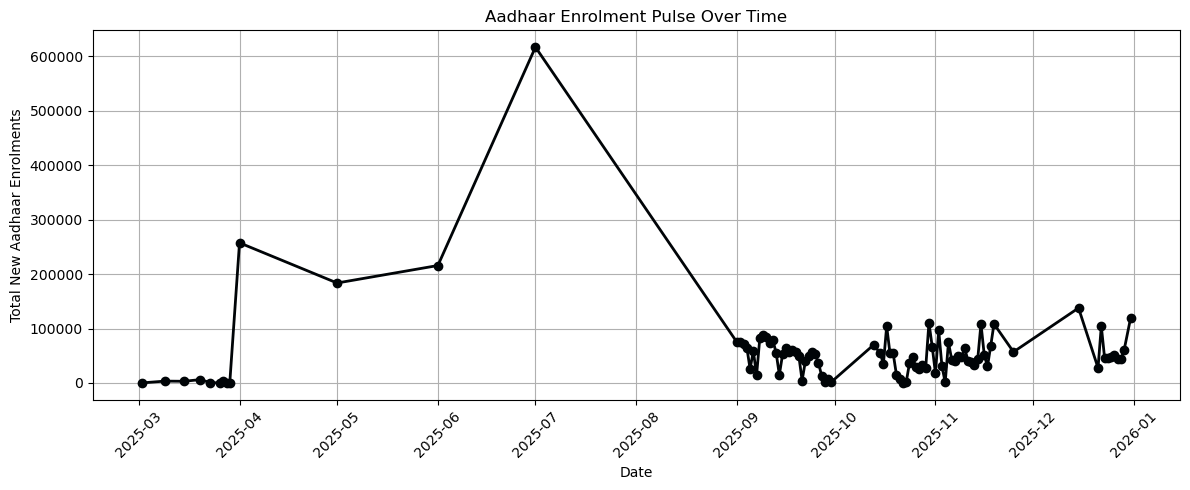

In [18]:
plt.figure(figsize=(12,5))
plt.plot(
    daily_pulse["date"],
    daily_pulse["total_enrollment"],
    color=colors[1],   # pick any one
    marker="o",
    linewidth=2
)

plt.title("Aadhaar Enrolment Pulse Over Time")
plt.xlabel("Date")
plt.ylabel("Total New Aadhaar Enrolments")
plt.ticklabel_format(style="plain", axis="y")
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()

